170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


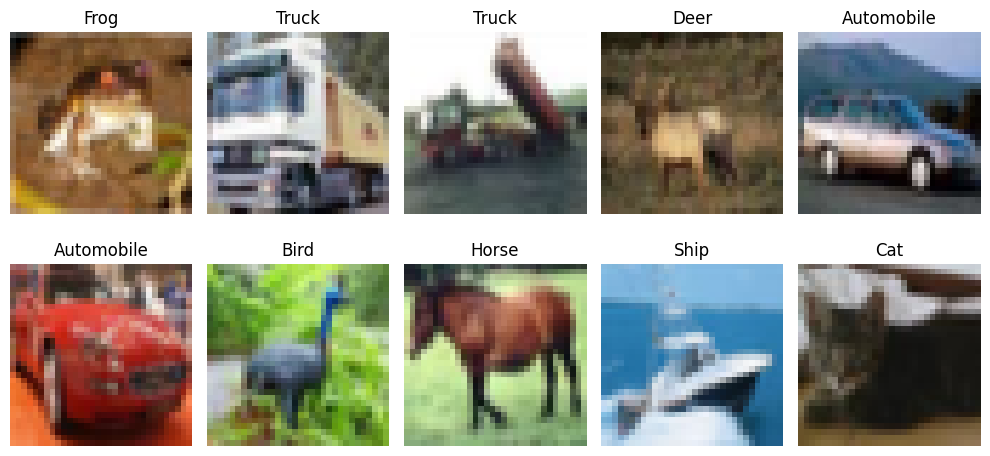

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step - accuracy: 0.3148 - loss: 1.8395 - val_accuracy: 0.5181 - val_loss: 1.3310
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.5417 - loss: 1.2860 - val_accuracy: 0.5621 - val_loss: 1.2127
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6051 - loss: 1.1137 - val_accuracy: 0.6205 - val_loss: 1.0654
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6446 - loss: 1.0143 - val_accuracy: 0.6363 - val_loss: 1.0272
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.6738 - loss: 0.9300 - val_accuracy: 0.6707 - val_loss: 0.9454
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.6939 - loss: 0.8769 - val_accuracy: 0.6828 - val_loss: 0.9120
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.7152 - loss: 0.8170 - val_accuracy: 0.6852 - val_loss: 0.9016
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.7310 - loss: 0.7820 - 

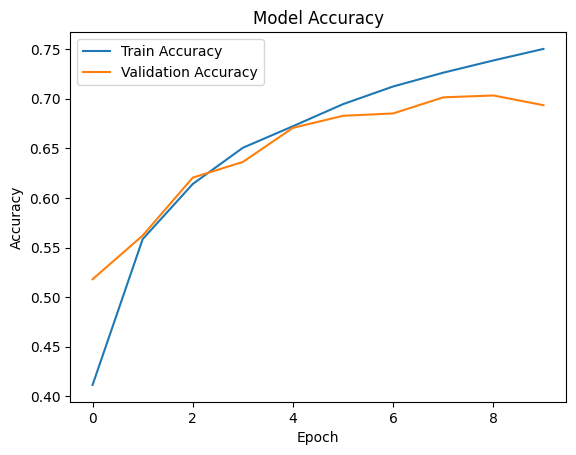

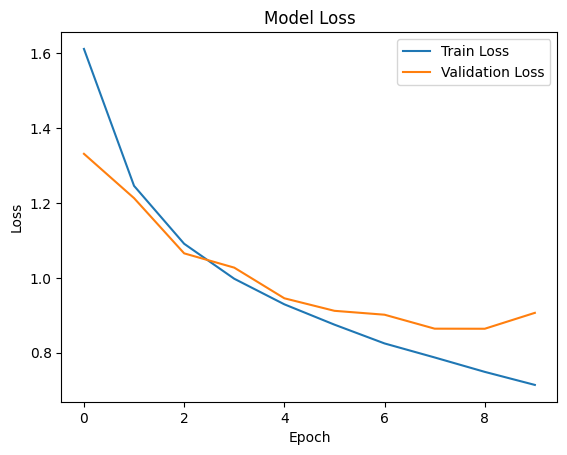

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Check class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
